In [1]:
pip install dowhy

In [2]:
pip install icecream

In [3]:
# important dependencies
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
from icecream import ic

In [4]:
causal_df = pd.read_csv('clean_diabetes_df.csv')

In [5]:
ic(causal_df)

ic| causal_df:      Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
               0             0          6.0    148.0           72.0             35   39.000   
               1             2          8.0    183.0           64.0             27   39.000   
               2             4          0.0    137.0           40.0             35  168.000   
               3             6          3.0     78.0           50.0             32   88.000   
               4             8          2.0    197.0           70.0             45  259.625   
               ..          ...          ...      ...            ...            ...      ...   
               763         762          9.0     89.0           62.0             21   39.000   
               764         763         10.0    101.0           76.0             48  180.000   
               765         764          2.0    122.0           70.0             27   39.000   
               766         765          5.0    121

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35,39.000,33.6,0.627,50,1
1,2,8.0,183.0,64.0,27,39.000,23.3,0.672,32,1
2,4,0.0,137.0,40.0,35,168.000,43.1,2.288,33,1
3,6,3.0,78.0,50.0,32,88.000,31.0,0.248,26,1
4,8,2.0,197.0,70.0,45,259.625,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...,...
763,762,9.0,89.0,62.0,21,39.000,22.5,0.142,33,0
764,763,10.0,101.0,76.0,48,180.000,32.9,0.171,63,0
765,764,2.0,122.0,70.0,27,39.000,36.8,0.340,27,0
766,765,5.0,121.0,72.0,23,112.000,26.2,0.245,30,0


In [6]:
# drop "Unnamed: 0" column
clean_causal_df = causal_df.drop(columns=['Unnamed: 0'])
clean_causal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35,39.000,33.6,0.627,50,1
1,8.0,183.0,64.0,27,39.000,23.3,0.672,32,1
2,0.0,137.0,40.0,35,168.000,43.1,2.288,33,1
3,3.0,78.0,50.0,32,88.000,31.0,0.248,26,1
4,2.0,197.0,70.0,45,259.625,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
763,9.0,89.0,62.0,21,39.000,22.5,0.142,33,0
764,10.0,101.0,76.0,48,180.000,32.9,0.171,63,0
765,2.0,122.0,70.0,27,39.000,36.8,0.340,27,0
766,5.0,121.0,72.0,23,112.000,26.2,0.245,30,0


In [7]:
# add "Obese" column
clean_causal_df['Obese'] = np.where(clean_causal_df['BMI']>= 30, 1, 0)
clean_causal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Obese
0,6.0,148.0,72.0,35,39.000,33.6,0.627,50,1,1
1,8.0,183.0,64.0,27,39.000,23.3,0.672,32,1,0
2,0.0,137.0,40.0,35,168.000,43.1,2.288,33,1,1
3,3.0,78.0,50.0,32,88.000,31.0,0.248,26,1,1
4,2.0,197.0,70.0,45,259.625,30.5,0.158,53,1,1
...,...,...,...,...,...,...,...,...,...,...
763,9.0,89.0,62.0,21,39.000,22.5,0.142,33,0,0
764,10.0,101.0,76.0,48,180.000,32.9,0.171,63,0,1
765,2.0,122.0,70.0,27,39.000,36.8,0.340,27,0,1
766,5.0,121.0,72.0,23,112.000,26.2,0.245,30,0,0


In [8]:
#Creating the causal graph 
causal_graph = """
digraph {
BMI;
Outcome;
Pregnancies;
Glucose;
BloodPressure;
SkinThickness;
Insulin;
DiabetesPedigreeFunction;
Age;
Obese;
Age -> DiabetesPedigreeFunction; Age -> BloodPressure; Age -> Obese
Pregnancies -> Glucose; Glucose -> Insulin; Pregnancies -> Obese;
Pregnancies -> BloodPressure; Pregnancies -> SkinThickness; SkinThickness -> Glucose;
Obese -> Outcome; Pregnancies -> Outcome;
Obese -> BloodPressure; Obese -> BMI; Obese -> SkinThickness; 
}
"""

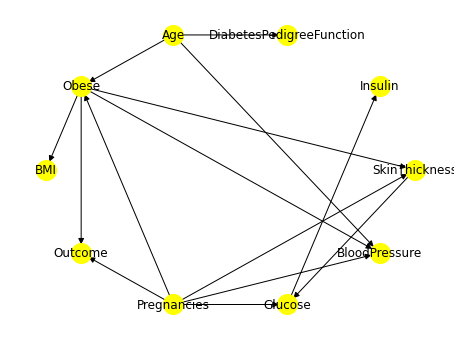

In [9]:
from IPython.display import Image, display
model= CausalModel(
        data = clean_causal_df,
        graph=causal_graph.replace("\n", " "),
        treatment='Obese',
        outcome='Outcome')
model.view_model()
# display(Image(filename="causal_model.png"))

In [10]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(Outcome|Pregnancies))
d[Obese]                                  
Estimand assumption 1, Unconfoundedness: If U→{Obese} and U→Outcome then P(Outcome|Obese,Pregnancies,U) = P(Outcome|Obese,Pregnancies)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Outcome, [Age])*Derivative([Obese], [Age])**(-1))
Estimand assumption 1, As-if-random: If U→→Outcome then ¬(U →→{Age})
Estimand assumption 2, Exclusion: If we remove {Age}→{Obese}, then ¬({Age}→Outcome)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [11]:
#Causal Effect Estimation
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

propensity_score_weighting
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(Outcome|Pregnancies))
d[Obese]                                  
Estimand assumption 1, Unconfoundedness: If U→{Obese} and U→Outcome then P(Outcome|Obese,Pregnancies,U) = P(Outcome|Obese,Pregnancies)

## Realized estimand
b: Outcome~Obese+Pregnancies
Target units: ate

## Estimate
Mean value: 0.27884081384464854



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Estimate the causal effect and compare it with Average Treatment Effect
# estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", test_significance=True)
print(estimate)
print("Causal Estimate is " + str(estimate.value))
data_1 = clean_causal_df[clean_causal_df["Obese"]==1]
data_0 = clean_causal_df[clean_causal_df["Obese"]==0]
print("ATE", np.mean(data_1["Outcome"])- np.mean(data_0["Outcome"]))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(Expectation(Outcome|Pregnancies))
d[Obese]                                  
Estimand assumption 1, Unconfoundedness: If U→{Obese} and U→Outcome then P(Outcome|Obese,Pregnancies,U) = P(Outcome|Obese,Pregnancies)

## Realized estimand
b: Outcome~Obese+Pregnancies
Target units: ate

## Estimate
Mean value: 0.27884081384464854

Causal Estimate is 0.27884081384464854
ATE 0.292644655116051


In [13]:
refutel = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Refute: Add a random common cause
Estimated effect:0.27884081384464854
New effect:0.278696967648771
p value:0.43999999999999995



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
